In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

<font size=18>Homework 04: Quadratic Programming and Local Optimization</font>

# **HW4.1** - Textbook 13-7.2

Consider the following quadratic programming problem:

Maximize $f(x_1, x_2) = 8x_1 - x_1^2 + 4x_2 - x_2^2,$

subject to $x_1 + x_2 \leq 2, x_1 \geq 0, x_2 \geq 0.$

Use Pyomo with the `ipopt` solver to find the solution.  Include nicely formatted output.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [2]:
import pyomo.environ as pyo

# Concrete Model
model = pyo.ConcreteModel()

model.x1 = pyo.Var(domain=pyo.NonNegativeReals)
model.x2 = pyo.Var(domain=pyo.NonNegativeReals)

# Objective
model.max = pyo.Objective(expr=8 * model.x1 - model.x1**2 + 4 * model.x2 - model.x2**2,
                         sense=pyo.maximize)

# Constraints
model.Constraint1 = pyo.Constraint(expr= model.x1 + model.x2 <= 2)

# Solve
solver = pyo.SolverFactory('ipopt')
solver.solve(model)

# display solution
print(f"Optimal solution: {model.max():,.0f}")
print(f"at (x1, x2) = ({model.x1():,.0f}, {model.x2():,.0f})")


Optimal solution: 12
at (x1, x2) = (2, 0)


# **HW4.2** - Textbook 13.7-7

The management of the Albert Hanson Company is trying to determine the best product mix for two new products. Because these products would share the same production facilities, the total number of units produced of the two products combined cannot exceed two per hour. Because of uncertainty about how well these products will sell, the profit from producing each product provides decreasing marginal returns as the production rate is increased. In particular, with a production rate of $R_1$ units per hour, it is estimated that Product 1 would provide a profit (in dollars per hour) of $200 R_1 - 100 R_1^2.$ If the production rate of product 2 is $R_2$ units per hour, its estimated profit (in dollars per hour) would be $300 R_2 - 100 R_2^2.$  

**HW4.2a** - Formulate a quadratic programming model in algebraic form for determining the product mix that maximizes the total profit per hour.  We are allowing fractional solutions here so this is not an integer programming problem (more about those soon).  Include LaTeX or neat handwritten solution.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

<font color = "green">
Maximize $Z = 200R_1 - 100R_1^2 + 300R_2 - 100R_2^2,$

subject to $R_1 + R_2 \leq 2, R_1 \geq 0, R_2 \geq 0.$

</font>

**HW4.2b** - Use quadratic programming in Pyomo with the ipopt solver to solve this model.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [3]:
# Concrete Model
model = pyo.ConcreteModel()

model.R1 = pyo.Var(domain=pyo.NonNegativeReals)
model.R2 = pyo.Var(domain=pyo.NonNegativeReals)

# Objective
model.profit = pyo.Objective(expr=200 * model.R1 - 100 * model.R1**2 + 300 * model.R2 - 100 * model.R2**2,
                         sense=pyo.maximize)

# Constraints
model.Constraint1 = pyo.Constraint(expr= model.R1 + model.R2 <= 2)

# Solve
solver = pyo.SolverFactory('ipopt')
solver.solve(model)

# display solution
import babel.numbers as numbers
print(f"Max Profit = ${model.profit():,.2f} / hour")

print(f"R1 = ${model.R1():,.2f} / hour")
print(f"R2 = ${model.R2():,.2f} / hour")


Max Profit = $312.50 / hour
R1 = $0.75 / hour
R2 = $1.25 / hour


# **HW4.3** - Textbook Problem 13.10-5

For the nonconvex profit function $$p(x) = 100x^6 - 1359x^5 + 6836 x^4 - 15670 x^3 + 15870 x^2 - 5095 x$$
with $0 \leq x \leq 5.$ Graph the function on the interval and find all of the local maxima and minima.

**HW4.3a** - Graph the function in the range $0 \leq x \leq 5$:

<font color = "blue"> *** 2 points -  code in cell below *** (don't delete this cell) </font>

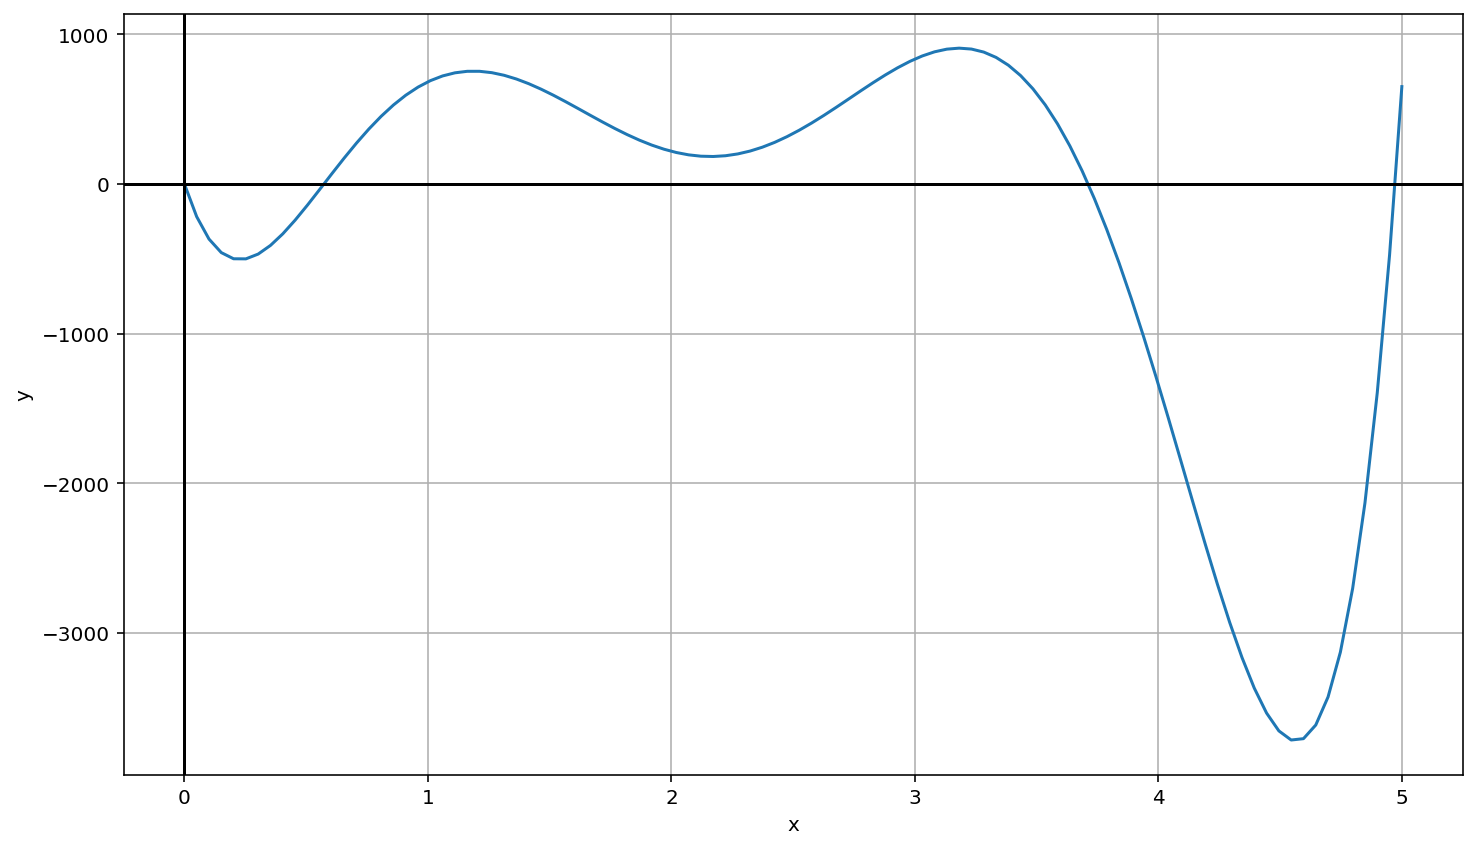

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, num=100)
P = lambda x:100 * x**6 - 1359 * x**5 + 6836 * x**4 - 15670 * x**3 + 15870 * x**2 - 5095 * x

plt.plot(x,P(x))
plt.axvline(color="black")
plt.axhline(color="black")
plt.xlabel('x');
plt.ylabel('y');
plt.grid()
plt.show()

**HW4.3b** -Find all of the local minima and maxima.  Your code should display nicely formatted output.  Include both the location ($x$) and the value of the profit ($p(x)$) for each extrema.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [5]:
from scipy.optimize import minimize

# find minima first
x0_min = [0,2,4.5]
for x0 in x0_min:
    result = minimize( P, x0, bounds = [(-.9,5.1)])
    print(f"There is a local minimum value of {result.fun[0]:.2f} at x = {result.x[0]:.2f}")
    
# now maxima
neg_p = lambda x:-P(x)
x0_max = [1, 3]
for x0 in x0_max:
    result = minimize( neg_p, x0, bounds = [(1,4)])
    print(f"There is a local maximum value of {-result.fun[0]:.2f} at x = {result.x[0]:.2f}")

There is a local minimum value of -504.75 at x = 0.23
There is a local minimum value of 183.07 at x = 2.16
There is a local minimum value of -3719.64 at x = 4.57
There is a local maximum value of 753.45 at x = 1.19
There is a local maximum value of 906.90 at x = 3.18


**HW4.3c** - Write a multistart procedure that starts from uniform randomly sampled points in $[0,5]$ to locate the absolute maximum value of profit.

<font color = "blue"> *** 4 points -  code in cell below *** (don't delete this cell) </font>

In [6]:
P = lambda x:100 * x**6 - 1359 * x**5 + 6836 * x**4 - 15670 * x**3 + 15870 * x**2 - 5095 * x
neg_p = lambda x:-P(x)

def multistart(dim, num_local_searches):
    maximum = 0
    for i in range(num_local_searches):
        x_initial = np.random.uniform(0, 5, dim)
        result = minimize(neg_p, x_initial, bounds = [(0,5)])
        if -result.fun > maximum:
            maximum = -result.fun[0]
            max_X = result.x[0]
    return maximum, max_X
    
dim = 1
num_local_searches = 50
max_value = multistart(dim,num_local_searches)
print(f"Global maximum: {max_value[0]:,.2f} at x = {max_value[1]:,.2f}")



Global maximum: 906.90 at x = 3.18


# **HW4.4** - Simple Linear Regression

To find the line of least squares fit of the form $\hat{y} = b_0 + b_1 x$ to fit data of the form $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$ we minimize a loss function.  The loss function is the sum of the squares residuals and only depends on $b_0$ and $b_1$ for fixed $xy$-data:

$$ SS(b_0,b_1) = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 = \sum_{i=1}^{n} \left( y_i - (b_0 + b_1 x_i) \right)^2 $$.

The file age_height.csv contains ages (years) and heights (inches) for 7 children. Write Python code to evaluate the loss function  and use `minimize` to identify the coefficients of the line of least squares fit for predicting height ($y$) from ($age$).  Include a scatter plot of the data that includes a plot of the line. Your solution will be similar to the logistic regression example but take care to adjust the objective function to minimize the sum of squares written above.

<font color = "blue"> *** 8 points -  answer in cell below *** (don't delete this cell) </font>


Slope is: 2.9375
Intercept is: 25.6250
Model is: Y = 2.9375 X + 25.6250



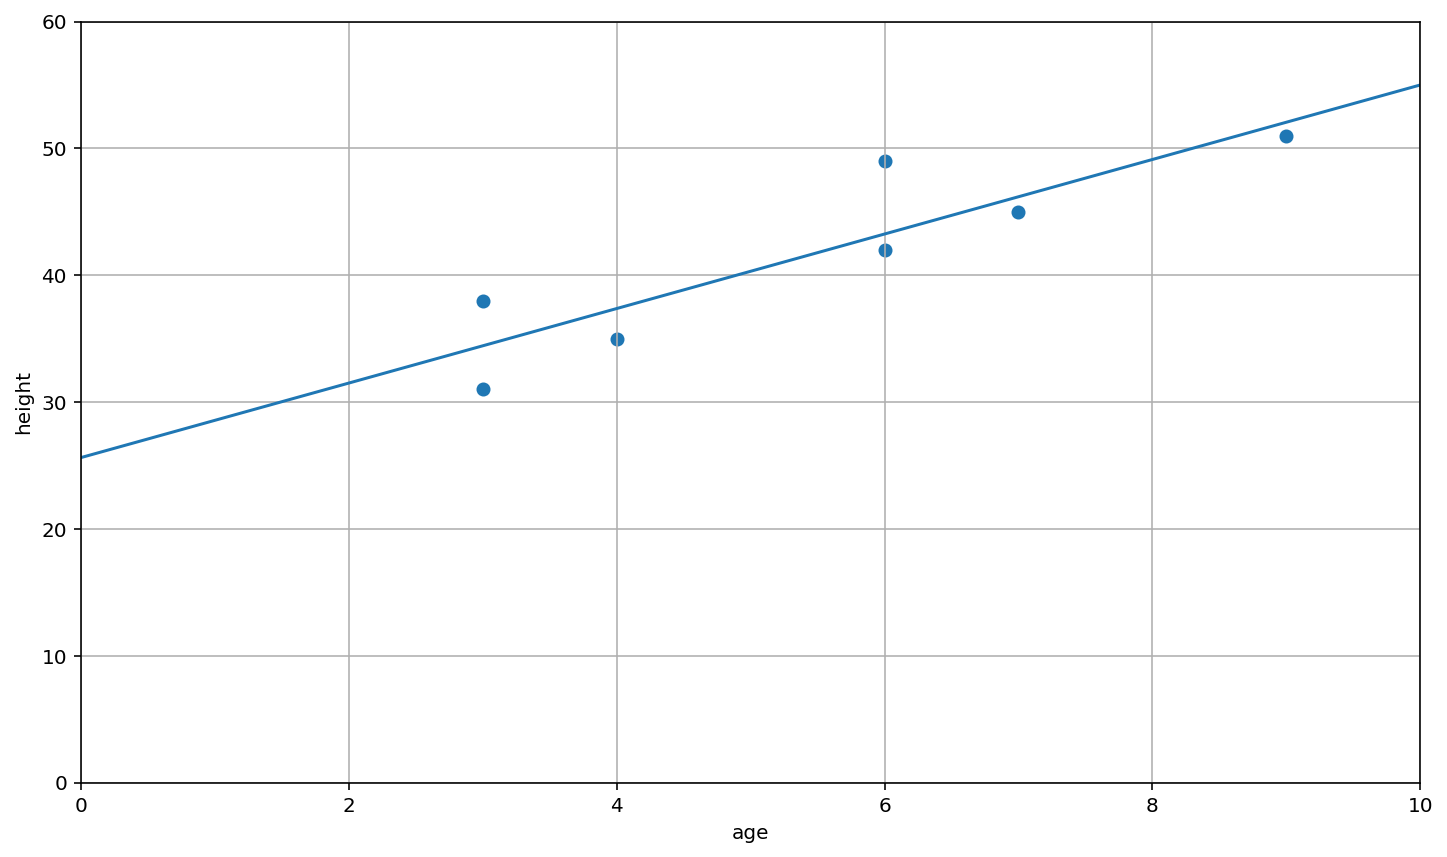

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# read in data
data = pd.read_csv("./data/age_height.csv")
age = np.array(data['age'])
height = np.array(data['height'])


# loss function
def neg_LR_loss( coef, *args):
    b0 = coef[0]
    b1 = coef[1]
    x = args[0]
    y = args[1]
    LR = sum((y - (b0 + b1 * x))**2)
    return(LR)

# minimize
result = minimize(neg_LR_loss,[0,0],args=(age, height))
b0 = result.x[0]
b1 = result.x[1]

# validate in sklearn
# model = LinearRegression(fit_intercept = True)
# model.fit(age.reshape(-1,1), height)

# output
print(f"\nSlope is: {b1:.4f}")
print(f"Intercept is: {b0:.4f}")
print(f"Model is: Y = {b1:,.4f} X + {b0:,.4f}\n")

# plot
matplotlib.pyplot.scatter(age, height)
plt.xlabel("age")
plt.ylabel("height")
plt.xlim(0,10)
plt.ylim(0,60)
plt.grid()
plt.plot(np.linspace(0,10,100), (b1 * np.linspace(0,10,100) + b0))
plt.show()


# **HW4.5** - Knapsack Optimization

The knapsack problem is a classical combinatorial optimization problem that will be good for practicing with the ideas of discrete local search and multistart.  Given a set of items, each with a weight and a value, determine which items to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible.  In the 0-1 version of the knapsack problem, the decision variables are binary (or boolean) and represent whether or not to include each item in the collection.  We'll start with 20 items and you need to determine the collection of items that maximizes the value and keeps the total weight up to 50 (that is $\leq 50$).

In [8]:
# generate random weights and values for a knapsack problem
import numpy as np
num_items = 20
np.random.seed(seed=123)
values = np.random.randint(low=5, high=50, size=num_items)
weights = np.random.randint(low=1, high=10, size=num_items)
max_weight = 50
np.random.seed() # use system clock to reset the seed so future random numbers will appear random

The variables will be a vector of booleans of length `num_items`.  We could initialize a vector like this and then set the vector to include the 1st, 3rd, and 5th items:

In [9]:
x = np.zeros(num_items, dtype = bool)  # all false
x[[0,2,4]] = True
x

array([ True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

The total weight of the items included in the collection:

In [10]:
tot_weight = sum( weights[x] )
tot_weight

11

The total value of the items included in the collection:

In [11]:
tot_value = sum( values[x] )
tot_value

68

Implement a local search where the search starts with no items included in the collection and generates new states (moves) by randomly choosing one of the booleans in the state vector and toggling it.  Like this:

In [12]:
# try executing this cell a few times and watch x change
bit_to_flip = np.random.randint(num_items)
x[bit_to_flip] = ~x[bit_to_flip]
x

array([ True, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

Accept the state if the total weight is is $\leq 50$ and maximize the value by moving uphill

**HW4.5a** - Write a local search algorithm that moves uphill  until no improvements have been made in the last 1000 iterations.  Write the algorithm as a function with the values and weights as inputs and returns the best collection of items to include as well as the value and weight of that collection.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [13]:
def knapsack_local(weights,values):
    # initialize
    bag = np.zeros(num_items, dtype = bool) 
    iterations = 0
    tot_weight = sum(weights[bag])
    tot_value = sum(values[bag])
    new_bag = bag

    while (iterations < 1000):
        
        bit_to_flip = np.random.randint(num_items)
        new_bag[bit_to_flip] = ~new_bag[bit_to_flip]
        new_weight = sum(weights[new_bag])
        new_value = sum(values[new_bag])
        
        if (new_weight <= 50 and new_value > tot_value):
            bag = new_bag
            iterations = 0
            tot_weight = sum(weights[bag])
            tot_value = sum(values[bag])
            keep_bag = new_bag
        else:
            iterations += 1
            new_bag = bag
           
    return tot_value, tot_weight, keep_bag

knapsack_local(weights, values)


(391, 49, array([ True, False, False,  True, False,  True, False, False, False,
         True,  True,  True, False, False, False, False,  True,  True,
         True,  True]))

**HW4.5b** - Now write a loop to do this 100 local searches (each with random moves starting from a collection with no items in it.  Clearly identify the best overall solution.  Next week we'll see some alternative search tecniques that will generally enable us to find better solutions.

<font color = "blue"> *** 5 points -  answer in cell below *** (don't delete this cell) </font>

In [14]:
cluster_bomb = [knapsack_local(weights, values) for i in range(100)]

In [15]:
best_result = cluster_bomb[0]
for bomb in cluster_bomb:
    if bomb[0] > best_result[0]:
        best_result = bomb
    elif bomb[0] == best_result[0]:
        if bomb[1] < best_result[1]:
            best_result = bomb
print(f"Best result:\nValue: {best_result[0]}, Weight: {best_result[1]}, \nKnapsack Booleans: {best_result[2]}")
    

Best result:
Value: 419, Weight: 50, 
Knapsack Booleans: [False False  True  True  True False  True False False  True  True  True
 False False  True  True False  True False  True]


# **HW4.6** - Object Oriented Solution to Gerrymandering Problem

The Gerrymandering Problem was a Self_Assessment problem near the end of the Lesson_04 notebook.  You can see our solution in the Self_Assessement_Soln notebook.  Use the locsearch package in this directory to find a local solution to the Gerrymandering problem.  You can follow the example at the end of Lesson_04, but note that the locsearch package minimizes a function and the Gerrymandering Problem is a maximization problem so you'll have negate the output of the fitness function.  Notes:  you should include `cities` and `num_districts` in your `__init__` constructor since the objective function needs both of those extra arguments; in your `move()` method you'll have to figure out `num_cities`

We've copied the set up code from the lesson for your convenience.  Use `summarize_districts()` to display your final result.

In [5]:
import numpy as np
import pandas as pd

# load the data + random assignment
num_districts = 10
min_voters_in_district = 150
max_voters_in_district = 350

dems = [152,81,75,34,62,38,48,74,98,66,83,86,72,28,112,45,93,72]
reps = [62,59,83,52,87,87,69,49,62,72,75,82,83,53,98,82,68,98]
cities = pd.DataFrame( data = {'dems':dems, 'reps':reps})

# initial assignment
assign = np.random.randint(low=0,high=num_districts,size = 18)

# ***maximize*** this function
def fitness_districts(assign, cities, num_districts):
    df = cities.groupby(assign).sum()
    fitness = sum(df['reps'] > df['dems'])
    total_voters = np.zeros(num_districts, dtype=np.int32)
    total_voters[df.index] = df.sum(axis=1)
    fitness -= np.abs(
        np.minimum(np.maximum(total_voters, 150), 350) - total_voters).sum()
    return -(fitness)

# to display output, not used in optimization
def summarize_districts(assign, cities):
    reps = np.zeros(num_districts, dtype=np.int32)
    dems = np.zeros(num_districts, dtype=np.int32)
    df = cities.groupby(assign).sum()
    reps[df.index] = df['reps']
    dems[df.index] = df['dems']
    total = reps + dems
    delta = np.minimum(np.maximum(total, min_voters_in_district),
                       max_voters_in_district) - total
    rep_win = reps > dems
    dict = {'reps': reps, 'dems': dems, 'total': total, 'rep_win': rep_win}
    return (pd.DataFrame(data=dict))

In [6]:
fitness_districts(assign, cities, num_districts)

1177

<font color = "blue"> *** 10 points -  answer in cell below *** (don't delete this cell) </font>

In [11]:
def move_one_city(assign, num_districts):
    num_cities = assign.shape[0] # or len(assign)
    new_assign = assign.copy()
    switch_city = np.random.randint(num_cities) # which city to assign new random district
    while new_assign[switch_city] == assign[switch_city]: # loops until new and old are different
        new_assign[ switch_city] = np.random.randint(num_districts)
    return new_assign

from locsearch import LocalSearcher

class GerryMandering(LocalSearcher):
    
    # pass extra data (the distance matrix) into the constructor
#     def __init__(self, state, num_districts):
#         self.num_districts = num_districts
#         super(GerryMandering, self).__init__(state)  # important!
        
    def move(self):
        self.state = move_one_city(self.state, state)
        
    def objective(self):
        return fitness_districts(self.state, num_districts)
    
gm = GerryMandering(cities)
gm.localsearch()


# ran out of time and stamina on this one...   

TypeError: objective() missing 1 required positional argument: 'num_districts'